## FCN - Simulate the `Detection Layer` Process 

We generate the inputs to `DetectTargetLayer` , to manipulate and modify the layer to procduce a modified `output_rois` 
containing false positives. 
This will be passed on the the heatmap layer, and through there will become the input to FCN.

#### setup MRCNN and FCN models and load weights

In [56]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
%matplotlib inline
%load_ext autoreload
%autoreload 2
import sys,os, pprint
pp = pprint.PrettyPrinter(indent=2, width=100)
print('Current working dir: ', os.getcwd())
if '..' not in sys.path:
    print("appending '..' to sys.path")
    sys.path.append('..')
    
import numpy as np
# import matplotlib as plt
import mrcnn.utils     as utils
import mrcnn.visualize as visualize

from mrcnn.prep_notebook import build_fcn_inference_pipeline, build_mrcnn_inference_pipeline,run_mrcnn_detection
from mrcnn.visualize     import display_training_batch
from mrcnn.prep_notebook import get_inference_batch, get_image_batch, run_mrcnn_detection, run_fcn_detection
from mrcnn.coco import prep_coco_dataset
# from mrcnn.visualize import (plot_3d_heatmap, plot_2d_heatmap, plot_2d_heatmap_compare, plot_3d_heatmap_compare,
#                             display_heatmaps, display_heatmaps_fcn, display_heatmaps_mrcnn, display_heatmaps_mrcnn_fcn)
                             
# WEIGHT_FILE = 'F:/models/train_fcn8_coco_adam/fcn20181109T0000/fcn_2298.h5'

##------------------------------------------------------------------------------------
## Parse command line arguments
##------------------------------------------------------------------------------------
parser = utils.command_line_parser()
input_parms  =" --batch_size     1  "
input_parms +=" --mrcnn_logs_dir train_mrcnn_coco "
# input_parms +=" --fcn_logs_dir   train_fcn8_coco_adam " 
input_parms +=" --fcn_logs_dir   train_fcn8_bce " 

input_parms +=" --mrcnn_model    last "
# input_parms +=" --fcn_model      " + WEIGHT_FILE + "  "
input_parms +=" --mrcnn_model    last"
input_parms +=" --fcn_layer      all"
input_parms +=" --fcn_arch       fcn8 " 
input_parms +=" --sysout         screen "
input_parms +=" --scale_factor   4"
# input_parms +=" --coco_classes   78 79 80 81 82 44 46 47 48 49 50 51 34 35 36 37 38 39 40 41 42 43 "
input_parms +=" --coco_classes       78 79 80 81 82 44 46 47 48 49 50 51 34 35 36 37 38 39 40 41 42 43 10 11 13 14 15 "

args = parser.parse_args(input_parms.split())
utils.display_input_parms(args)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Current working dir:  E:\git_projs\MRCNN3\notebooks

Arguments passed :
--------------------
batch_size                     1
coco_classes                   [78, 79, 80, 81, 82, 44, 46, 47, 48, 49, 50, 51, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 10, 11, 13, 14, 15]
epochs                         1
fcn_arch                       FCN8
fcn_layers                     ['all']
fcn_logs_dir                   train_fcn8_bce
fcn_losses                     fcn_bce_loss
fcn_model                      last
last_epoch                     0
lr                             0.001
mrcnn_exclude_layers           None
mrcnn_logs_dir                 train_mrcnn_coco
mrcnn_model                    last
new_log_folder                 False
opt                            ADAGRAD
scale_factor                   4
steps_in_epoch                 1
sysout                         SCREEN
val_steps                      1




In [57]:
mrcnn_model, fcn_model = build_fcn_inference_pipeline(args = args,verbose = 0)


--> Execution started at: 12-09-2018 @ 19:04:54
    Tensorflow Version: 1.8.0   Keras Version : 2.2.0 

Arguments passed :
--------------------
batch_size                     1
coco_classes                   [78, 79, 80, 81, 82, 44, 46, 47, 48, 49, 50, 51, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 10, 11, 13, 14, 15]
epochs                         1
fcn_arch                       FCN8
fcn_layers                     ['all']
fcn_logs_dir                   train_fcn8_bce
fcn_losses                     fcn_bce_loss
fcn_model                      last
last_epoch                     0
lr                             0.001
mrcnn_exclude_layers           None
mrcnn_logs_dir                 train_mrcnn_coco
mrcnn_model                    last
new_log_folder                 False
opt                            ADAGRAD
scale_factor                   4
steps_in_epoch                 1
sysout                         SCREEN
val_steps                      1


 *** Keras Training mode: 0
 *** Keras Trai

    old_style_scores               :  shape: (?, 3)                KB.shape:(None, 3)             Keras Tensor: False
    alt_scores_1                   :  shape: (?, 3)                KB.shape:(None, 3)             Keras Tensor: False
    alt_scores_1_scattered         :  shape: (1, 81, 200, 3)       KB.shape:(1, 81, 200, 3)       Keras Tensor: False

       Normalize_scores() ------------------------------------------------------
         input shape      :  (1, 81, 200, 3)
         reduce_min shape :  (1, 81, 1, 3)
         reduce_max shape :  (1, 81, 1, 3)
             output shape :  (1, 81, 200, 3)

    alt_scores_1_norm(by_class)    :  shape: (1, 81, 200, 3)       KB.shape:(1, 81, 200, 3)       Keras Tensor: False
    alt_scores_1_norm(by_image)    :  shape: (?, 3)                KB.shape:(None, 3)             Keras Tensor: False

    Normalize heatmap within each class !-------------------------------------
    in_heatmap_norm :  (?, 81, 256, 256) Keras tensor  False
    normal

-----------------------------------------------
 Load Model with init parm: [ last ]
-----------------------------------------------
 ---> last
>>> load_weights() from : F:\models\train_fcn8_bce\fcn20181205T0000\fcn_0671.h5
    Weights file loaded: F:\models\train_fcn8_bce\fcn20181205T0000\fcn_0671.h5 
FCN  MODEL Load weight file COMPLETE 
 *** Keras Training mode after setting: 0


####  Load dataset

In [13]:
### Load dataset
print('load coco classes: ', args.coco_classes)
load_class_ids = args.coco_classes

# dataset_test, test_generator = prep_coco_dataset(["train", "val35k"], mrcnn_model.config, generator = True , load_coco_classes=load_class_ids)
 
dataset_test.display_class_info()
dataset_test.display_active_class_info()
print("Testing Dataset Image Count: {}".format(len(dataset_test.image_ids)))
print("Testing Dataset Class Count: {}".format(dataset_test.num_classes))
class_names = dataset_test.class_names


load coco classes:  [78, 79, 80, 81, 82, 44, 46, 47, 48, 49, 50, 51, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43]
 Class Information 
-------------------
BG                         source:              ext_id:   0   internal_id:   0  category: background            img_count:      0
person                     source: coco         ext_id:   1   internal_id:   1  category: person                img_count:  64115
bicycle                    source: coco         ext_id:   2   internal_id:   2  category: vehicle               img_count:   3252
car                        source: coco         ext_id:   3   internal_id:   3  category: vehicle               img_count:  12251
motorcycle                 source: coco         ext_id:   4   internal_id:   4  category: vehicle               img_count:   3502
airplane                   source: coco         ext_id:   5   internal_id:   5  category: vehicle               img_count:   2986
bus                        source: coco         ext_id:   6   internal_

## Display Images

### Get next image from generator and display 

 load image ud:  13562
Processing 1 images
image                    shape: (427, 640, 3)         min:    0.00000  max:  255.00000
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  146.10001
image_metas              shape: (1, 89)               min:    0.00000  max: 13562.00000
 Image_id    :  13562  Reference:  http://cocodataset.org/#explore?id=47735 Coco Id: 47735
 Image meta [13562   427   640     3   170     0   853  1024     1     1]
 Class ids   :  (28,)    [40 40 40 40 40 40 40 57 57 61  1  1  1  1  1  1  1  1  1  1  1  1 25 57 57 57  1 -1]
 Class Names :  ['bottle', 'bottle', 'bottle', 'bottle', 'bottle', 'bottle', 'bottle', 'chair', 'chair', 'dining table', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'backpack', 'chair', 'chair', 'chair', 'person', 'toothbrush']


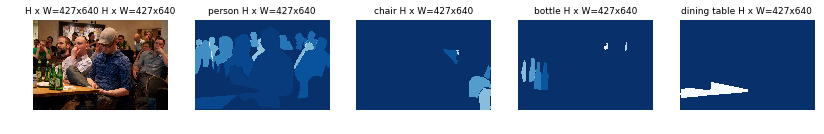

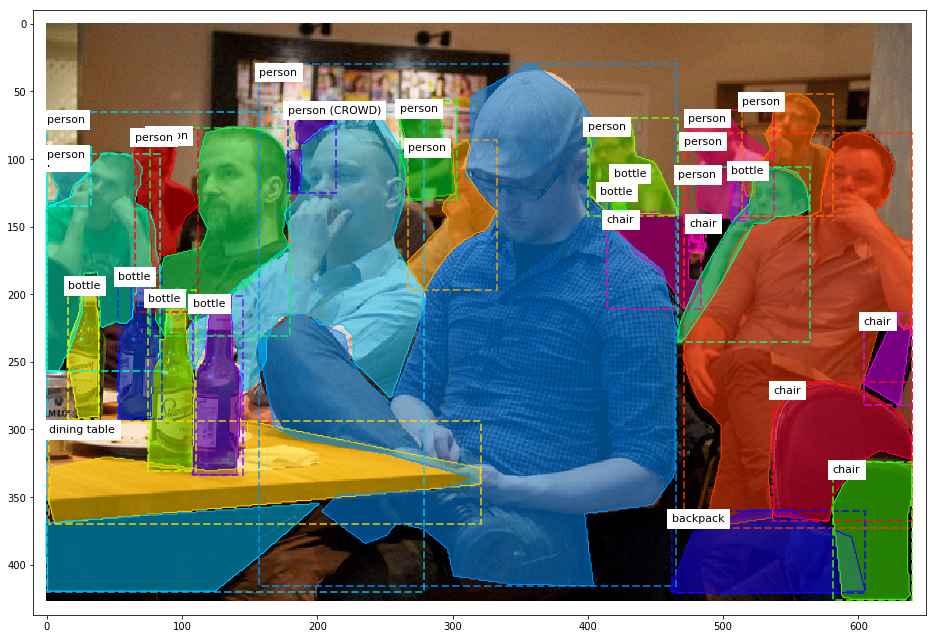

In [58]:
# test_batch_x, test_batch_y = next(test_generator)
# display_training_batch(dataset_test, test_batch_x, masks = True)
# test_batch_x = get_inference_batch(dataset_test, mrcnn_model ,generator = test_generator, display = True)
test_batch_x = get_inference_batch(dataset_test, mrcnn_model.config , image_ids = 13562, display = True)

### Get images using a list of image ids

Loading 1 images
image                    shape: (612, 612, 3)         min:    0.00000  max:  255.00000


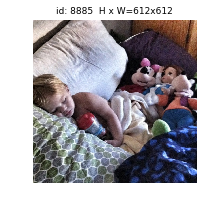

In [59]:
# IMAGE_LIST = [18388, 64305] # , 1507]
# IMAGE_LIST = [107639, 112710, 39775]
# IMAGE_LIST = [24627, 33758, 6749]
# IMAGE_LIST = [24627, 33758] # , 6749]
# IMAGE_LIST = [92929, 49399]   IMAGE_LIST = [88857, 74451]
IMAGE_LIST = [8885]
image_batch = get_image_batch(dataset_test,IMAGE_LIST, display=True)
# test_batch_x = get_training_batch(dataset_test, mrcnn_model.config, IMAGE_LIST)
# inference_batch, image_batch = get_inference_batch(dataset_test, mrcnn_model, IMAGE_LIST, display = True)
# IMAGE_LIST = [18388, 64305] # , 1507]
# IMAGE_LIST = [107639, 112710, 39775]

### Other display functions

#### Display top masks for sample images

In [ ]:
# Load and display random samples
image_ids = np.random.choice(dataset_test.image_ids, 7)
for image_id in image_ids:
    image = dataset_test.load_image(image_id)
    mask, class_ids = dataset_test.load_mask(image_id)
    visualize.display_top_masks(image, mask, class_ids, dataset_test.class_names)

####  Dispaly a random image from dataset_test

In [ ]:
# Load random image and mask. ### 27711 persons and boats
image_id = np.random.choice(dataset_test.image_ids)
_ = batch_input = demo_image(dataset_test, mrcnn_model.config, image_id, masks = False)

#### Get an image and place into train_batch_x

In [ ]:
IMAGE_LIST= [30531]
batch_input = get_training_batch(dataset_test, mrcnn_model.config, 30531, masks = False)

## FCN detection using `fcn.detect()` - run `image_batch` Image List through model pipeline

In [67]:
# fcn_results = run_fcn_detection(fcn_model, mrcnn_model, dataset_test, image_ids=[8885], verbose =1)
fcn_results = run_fcn_detection(fcn_model, mrcnn_model, dataset_test, image_ids=[10], verbose =1)

Image Id  : 10     External Id: coco.393268     Image Reference: http://cocodataset.org/#explore?id=393268
call mrcnn.detect()
Processing 1 images
image                    shape: (480, 640, 3)         min:    0.00000  max:  255.00000
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000
image_metas              shape: (1, 89)               min:    0.00000  max: 1024.00000
===>  call mrcnn_model.keras_model.predict()


 config.DETECTION_MAX_INSTANCES:  200
 Detections shape: (21, 7)
 mrcnn.evaluate() : Return from  predict()
    Length of detections   :  1
    Length of rpn_roi_proposals   :  1
    Length of mrcnn_class  :  1
    Length of mrcnn_bbox   :  1
    Length of pr_hm        :  1
    Length of pr_hm_scores :  1

   boxes_to_image_domain(): image_meta:  <class 'numpy.ndarray'> (89,)
 pr_scores_by_class shape: (81, 200, 24)
 molded_rois: (21, 4)
 final_rois: (21, 4)
 pr_scores_by_class shape: (81, 200, 24)
 pr_scores_by_image shape: (21, 24)
===> 

In [68]:
np.set_printoptions(linewidth=180,precision=4,threshold=10000, suppress = True)
print(' Length of fcn_results: ', len(fcn_results))
f = fcn_results[0]
print(f.keys())
for i in f.keys():
    print('   {:.<25s}  {}'.format(i , f[i].shape))

 Length of fcn_results:  1
dict_keys(['gt_class_id', 'fcn_scores_by_class', 'fcn_sm', 'image_meta', 'fcn_scores', 'pr_hm_scores', 'molded_image', 'rois', 'fcn_hm', 'pr_hm', 'gt_bbox', 'fcn_hm_scores', 'detections', 'scores', 'orig_image_meta', 'pr_scores', 'pr_scores_by_class', 'image', 'molded_rois', 'detection_ind', 'class_ids'])
   gt_class_id..............  (13,)
   fcn_scores_by_class......  (81, 200, 24)
   fcn_sm...................  (256, 256, 81)
   image_meta...............  (89,)
   fcn_scores...............  (21, 24)
   pr_hm_scores.............  (81, 200, 24)
   molded_image.............  (1024, 1024, 3)
   rois.....................  (21, 4)
   fcn_hm...................  (256, 256, 81)
   pr_hm....................  (256, 256, 81)
   gt_bbox..................  (13, 4)
   fcn_hm_scores............  (81, 200, 24)
   detections...............  (200, 7)
   scores...................  (21,)
   orig_image_meta..........  (89,)
   pr_scores................  (21, 24)
   pr_scores_by_

In [69]:
float_formatter = lambda x: "%10.4f" % x
np_format = {}
np_format['float']=float_formatter
np.set_printoptions(linewidth=195, precision=3, floatmode='fixed', threshold =10000, formatter = np_format)


In [70]:
f = fcn_results[0]
for molded_bbox, cls, scr, pr_scr, fcn_scr in zip(f['molded_rois'].astype(np.int), f['class_ids'],  f['scores'], f['pr_scores'], f['fcn_scores']):
    print('{} {:2d}  {:.<18s}  {:5.4f} {}  '.format(molded_bbox, cls, dataset_test.class_names[cls], scr, fcn_scr[[4,5,6,7, 8]]))
    print('{:>86s} {}'.format(' mrcnn old style scores:  ',  pr_scr[[9,10,11]]))
    print('{:>86s} {}'.format(' fcn old style scores:    ', fcn_scr[[9,10,11]]))
    print()
    print('{:>86s} {}'.format(' mrcnn alt scores1:  ',pr_scr[[12,13,14,15,16,17]]))
    print('{:>86s} {}'.format(' mrcnn_scores2 :  ',   pr_scr[[18,19,20,21,22,23]]))
    print()
    print('{:>86s} {}'.format(' fcn alt scores1:  ',fcn_scr[[12,13,14,15,16,17]]))
    print('{:>86s} {}'.format(' fcn_scores2:  '    ,fcn_scr[[18,19,20,21,22,23]]))
    print()

[373   3 583  85] 63  tv................  0.9975 [   63.0000     0.9975     1.0000   200.0000     1.0000]  
                                                             mrcnn old style scores:   [    0.9984  1076.2500     0.9984]
                                                             fcn old style scores:     [    5.3745  1076.2500     5.3745]

                                                                  mrcnn alt scores1:   [   52.1878    77.0000     0.6778     1.0000     1.0000     1.0000]
                                                                     mrcnn_scores2 :   [   52.1878    77.0000     0.6778     1.0000     1.0000     1.0000]

                                                                    fcn alt scores1:   [   18.3261    77.0000     0.2380     1.0000     1.0000     1.0000]
                                                                        fcn_scores2:   [   48.2060    77.0000     0.6261     1.0000     1.0000     1.0000]

[128 234 883 463]  1  per

##  FCN detection using `fcn.run_inference_pipeline()` - run `IMAGE_LIST` through detection pipeline

Loading 2 images
image                    shape: (398, 640, 3)         min:    0.00000  max:  255.00000
image                    shape: (428, 640, 3)         min:    0.00000  max:  255.00000


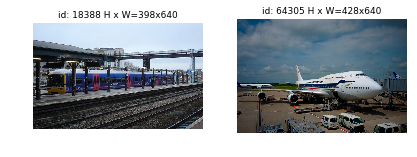

call mrcnn predict()
    Wrapper for Detection Layer : call()  <class 'list'> 4
     rpn_proposals_roi  : (2, 1000, 4) <class 'numpy.ndarray'>
     mrcnn_class.shape  : (2, 1000, 81) <class 'numpy.ndarray'>
     mrcnn_bboxes.shape : (2, 1000, 81, 4) <class 'numpy.ndarray'>
     image_meta         : (2, 89) <class 'numpy.ndarray'>


 Detections are:
[[517.     705.     582.     730.       1.       0.992 ]
 [454.      12.     614.     926.       7.       0.9695]
 [460.      77.     621.     243.       6.       0.7139]
 [521.     699.     571.     713.       1.       0.5538]
 [521.     723.     578.     738.       1.       0.5355]]


 Detections are:
[[ 436.       50.      686.      879.        5.        0.9997]
 [ 485.      936.      528.     1001.        5.        0.9936]
 [ 545.        0.      586.      220.        5.        0.9925]
 [ 742.      506.      838.      616.        8.        0.9227]
 [ 757.      284.      853.      554.        8.        0.9176]
 [ 652.      521.      716.  

In [81]:
# mrcnn_model.layer_info()
# fcn_model.layer_info()
# # IMAGE_LIST = [18388, 64305, 1507]
# # IMAGE_LIST = [24627, 33758] # , 6749]
IMAGE_LIST = [18388, 64305] #1507]
# IMAGE_LIST = [88857, 74451]
fcn_results = fcn_model.run_inference_pipeline(mrcnn_model, dataset_test, IMAGE_LIST, verbose = True)

## Visualize results from `fcn.run_inference_pipeline()`

In [61]:
img_id = 0
f = fcn_results[0]
image_id=f['orig_image_meta'][0]
print('Image id: ',image_id, ' Coco ID: ', dataset_test.image_info[image_id]['id'])
print(f['pr_scores'][:,4])
pr_class_ids = np.unique(f['pr_scores'][:,4]).astype(int).tolist()
fcn_class_ids = np.unique(f['fcn_scores'][:,4]).astype(int).tolist()
print('Pred class ids: ', pr_class_ids)
print('FCN  class ids: ', fcn_class_ids)

Image id:  8885  Coco ID:  293587
[ 1. 78. 60. 58.  1.  1. 40.  1. 42. 78.  1. 60. 60.]
Pred class ids:  [1, 40, 42, 58, 60, 78]
FCN  class ids:  [1, 40, 42, 58, 60, 78]


 display_instances() : Image shape:  (612, 612, 3)


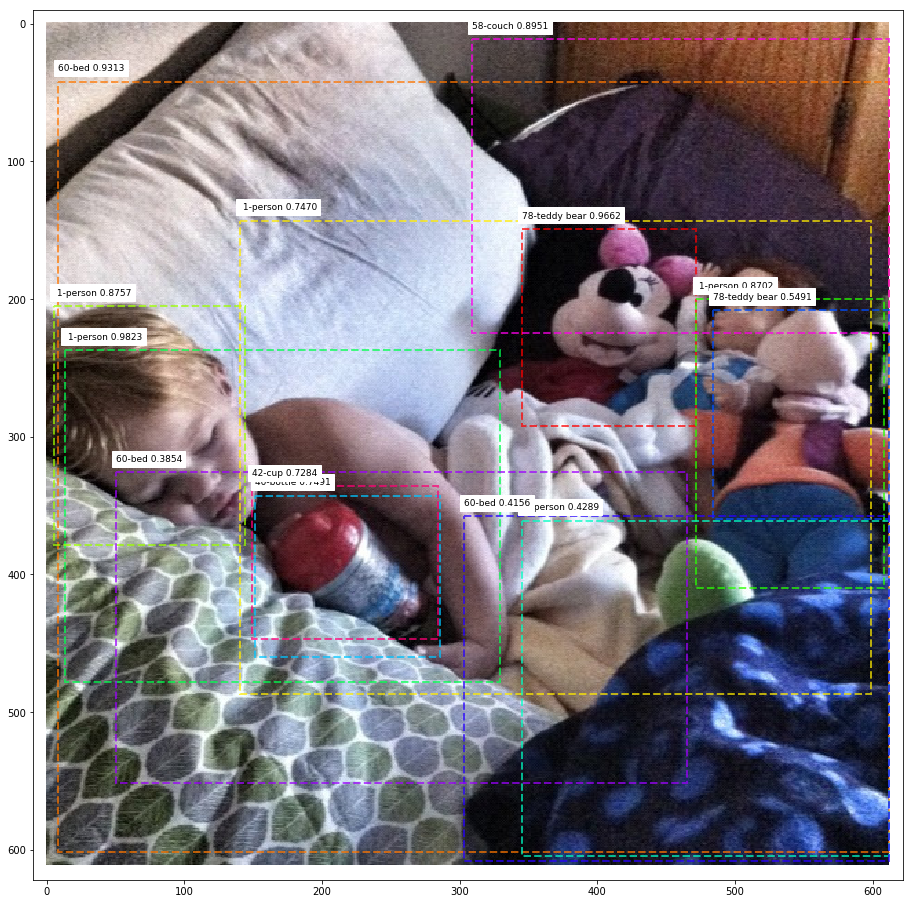

In [62]:
np.set_printoptions(linewidth=180,precision=4,threshold=10000, suppress = True)
# for img_idx in [1]:
img_idx = 0
# f = fcn_results[img_idx]
# print(f['fcn_scores'])
visualize.display_instances_from_prscores(f['image'], f['fcn_scores'], class_names, score_range=(0.0, 1.72))

## 2D heatmaps

 Scaling options are 'all', 'class'/'each', 'clip', or 'none' 
 Shape of Z:  (256, 256, 81)  boxes:  (81, 200, 24)
 Image Id:  0  Display classes: [ 1 25 27 29 40 46 57 58 63 66]
 rows   4  columns : 3 boxes.shape :  (81, 200, 24)
 min_z_all shape: ()  min_z_all: 0.0  max_z_all: () max_z_all: 1.0
 min_z_cls shape: (1, 1, 81)  max_z_cls shape: (1, 1, 81)
 SCALING == none 


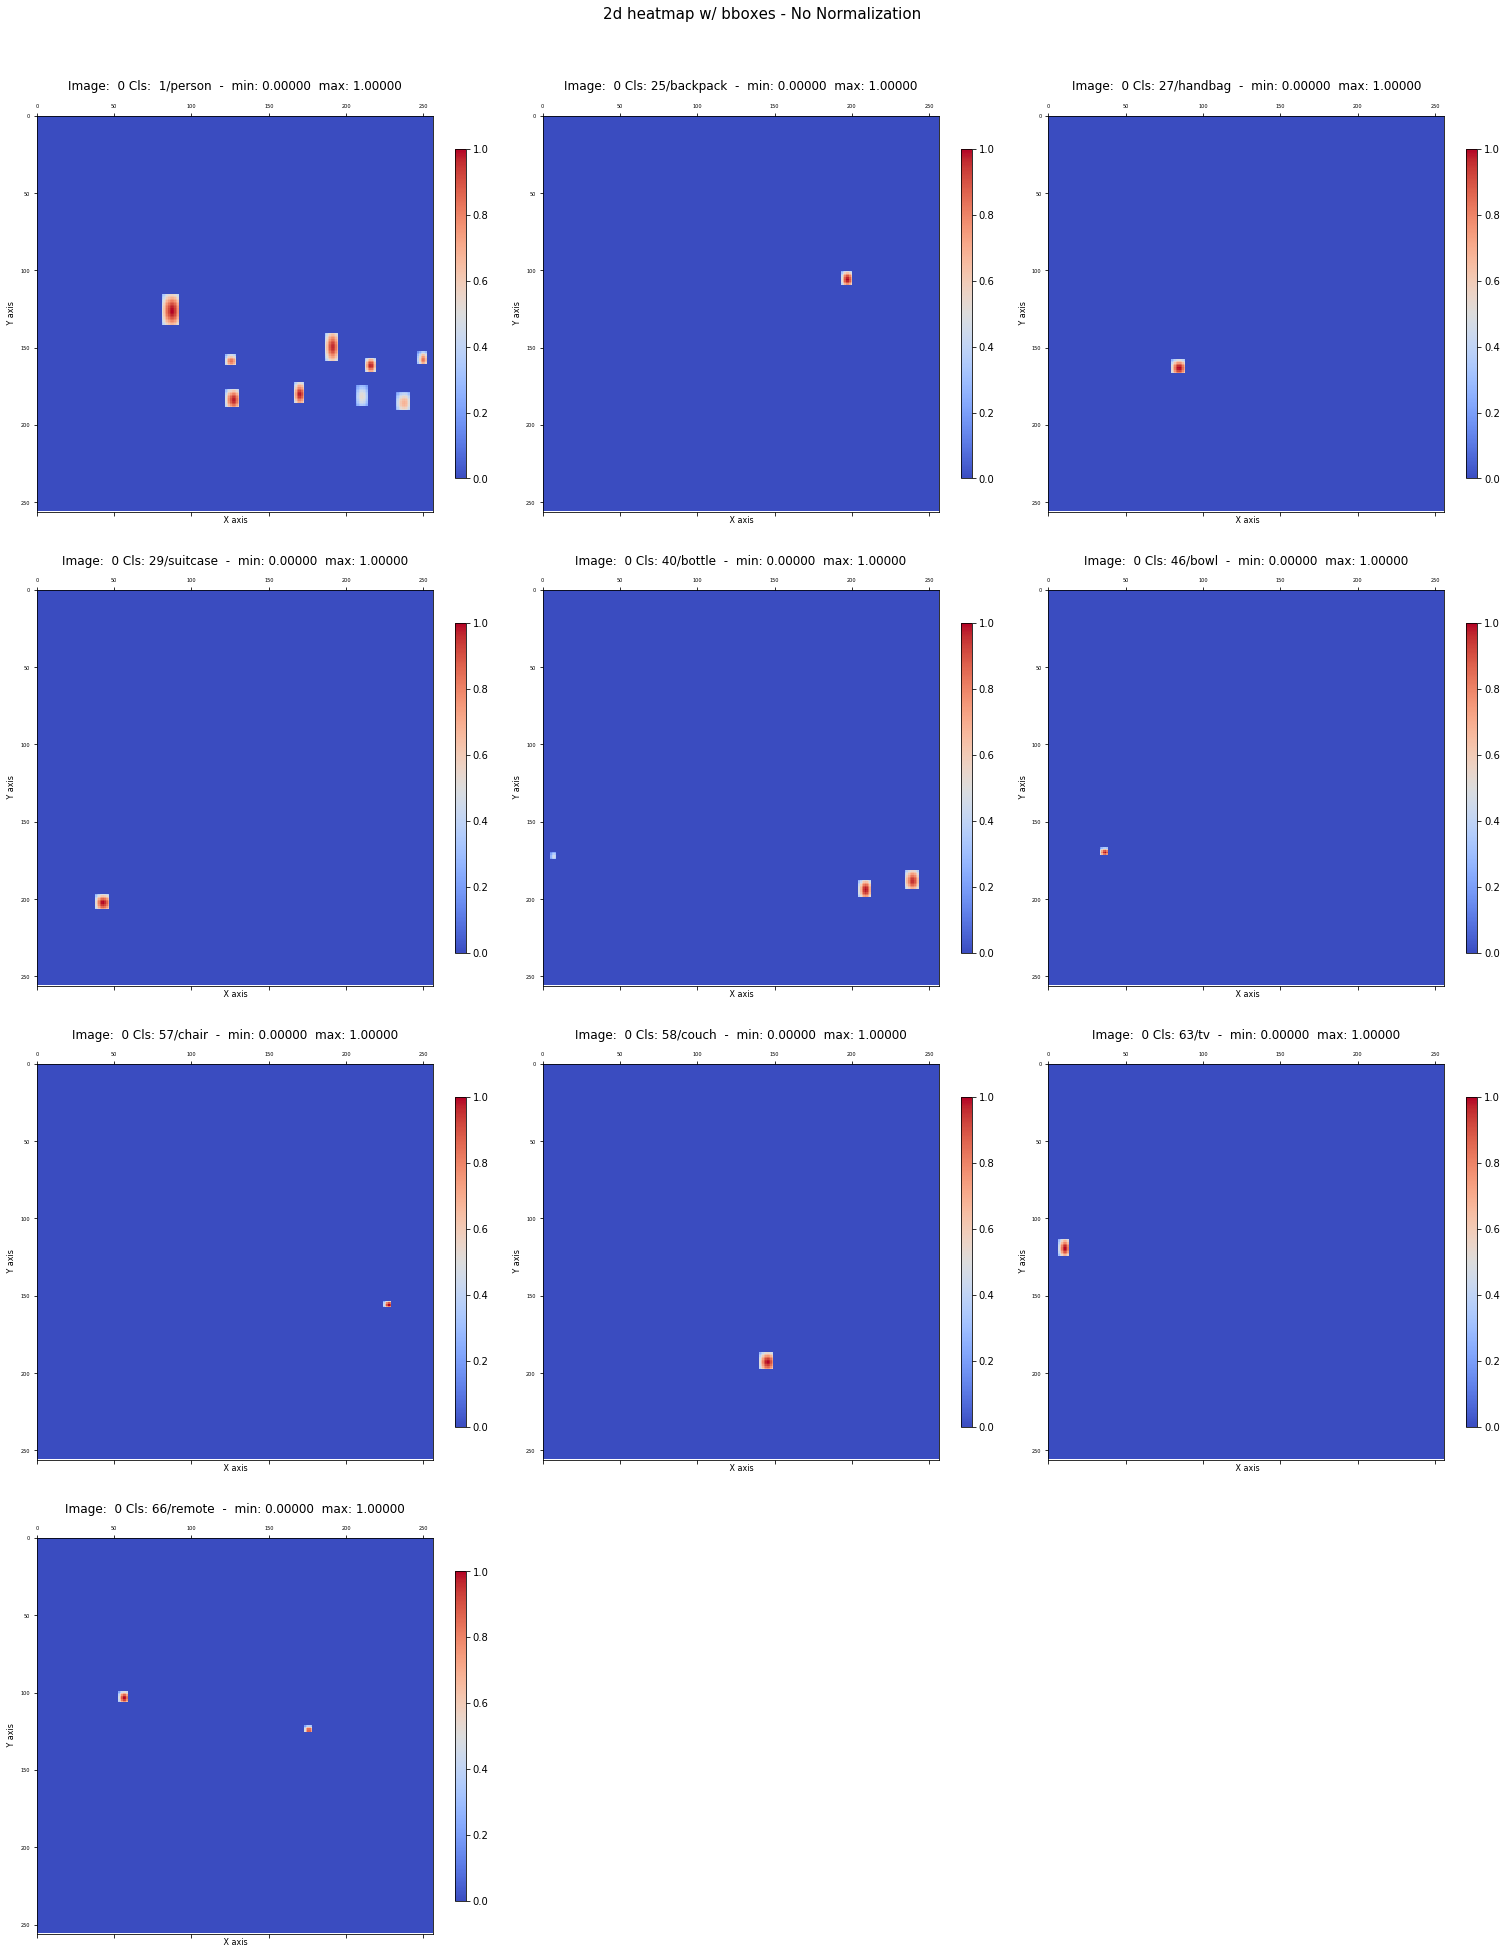

In [71]:
img_id = 0
 
pr_class_ids = np.unique(f['class_ids'])
fig = visualize.plot_2d_heatmap(f['pr_hm'], f['pr_scores_by_class'], img_id, pr_class_ids, columns = 3, num_bboxes = 0,
                          class_names = class_names, scale = 4, scaling = 'none')

 Scaling options are 'all', 'class'/'each', 'clip', or 'none' 
 Shape of Z:  (256, 256, 81)  boxes:  (81, 200, 24)
 Image Id:  0  Display classes: [ 1 25 27 29 40 46 57 58 63 66]
 rows   4  columns : 3 boxes.shape :  (81, 200, 24)
 min_z_all shape: ()  min_z_all: -0.36424288  max_z_all: () max_z_all: 1.0035503
 min_z_cls shape: (1, 1, 81)  max_z_cls shape: (1, 1, 81)
 SCALING == none 


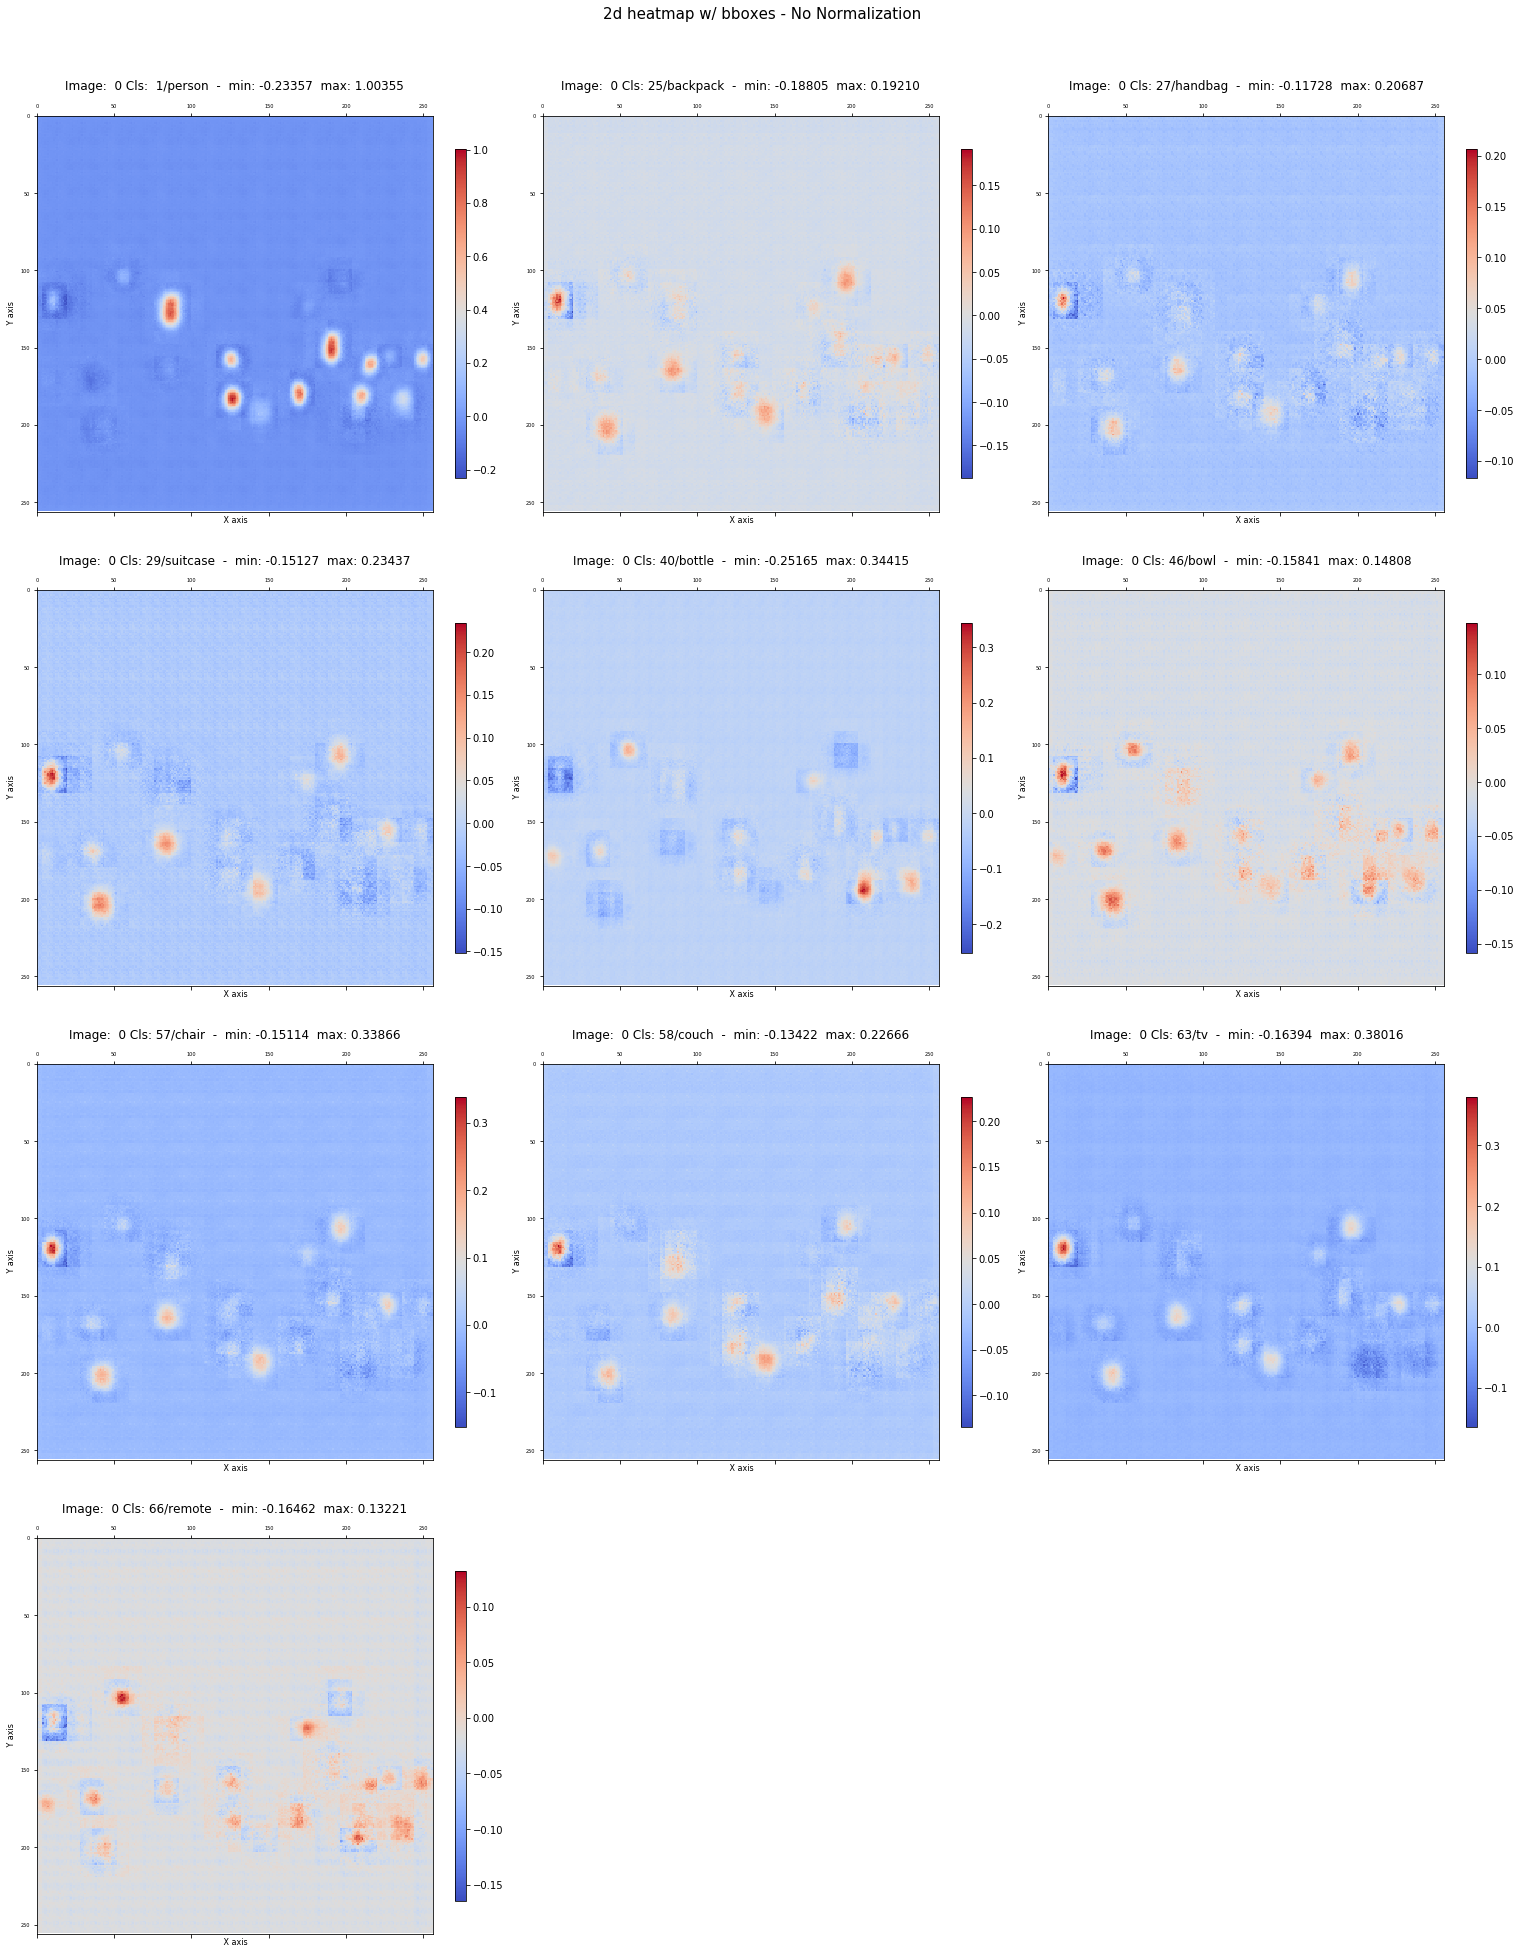

In [72]:
img_id = 0
pr_class_ids = np.unique(f['class_ids'])
fig = visualize.plot_2d_heatmap(f['fcn_hm'], f['fcn_scores_by_class'], img_id, pr_class_ids, columns = 3, num_bboxes = 0,
                          class_names = class_names, scale = 4, scaling = 'none')

## Overlay Images with Heatmaps

### Overlay image with pred_heatmaps

In [ ]:
from mrcnn.visualize import display_heatmaps, display_heatmaps_fcn, display_heatmaps_mrcnn, inference_heatmaps_display
# visualize.display_image_bw(image)
# print(model_gt_heatmap_scores.shape)
class_ids = np.unique(f['pr_scores'][:,4]).astype(int).tolist()
print('class ids: ', class_ids)
inference_heatmaps_display(fcn_results, 0, class_ids = class_ids, class_names = coco_class_names, hm = 'pr_hm' ,config = mrcnn_model.config, scaling = 'class') 
# , display_heatmaps_mrcnn(train_batch_x, model_output, 0, hm = 'pr',  
#                      config = mrcnn_config, class_ids = class_ids)

### Overlay image with fcn_heatmaps

In [ ]:
from mrcnn.visualize import display_heatmaps, display_heatmaps_fcn, display_heatmaps_mrcnn, inference_heatmaps_display
# visualize.display_image_bw(image)
# print(model_gt_heatmap_scores.shape)
class_ids = np.unique(f['pr_scores'][:,4]).astype(int).tolist()
print('class ids: ', class_ids)
inference_heatmaps_display(fcn_results, 0, class_ids = class_ids, class_names = coco_class_names, hm = 'fcn_hm' ,config = mrcnn_model.config, scaling = 'class') 
# , display_heatmaps_mrcnn(train_batch_x, model_output, 0, hm = 'pr',  

### Overlay image with pr_heatmaps and fcn_heatmaps

 Scaling options are: 'all', 'class', 'each' , or  'clip' : 
 heatmap shape:  (256, 256, 81)
 Bounding boxes shape:  (81, 200, 24)
Image shape : (332, 500, 3)  class_ids: [ 5 10]


D:\Program Files\Anaconda3\envs\TF\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
D:\Program Files\Anaconda3\envs\TF\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


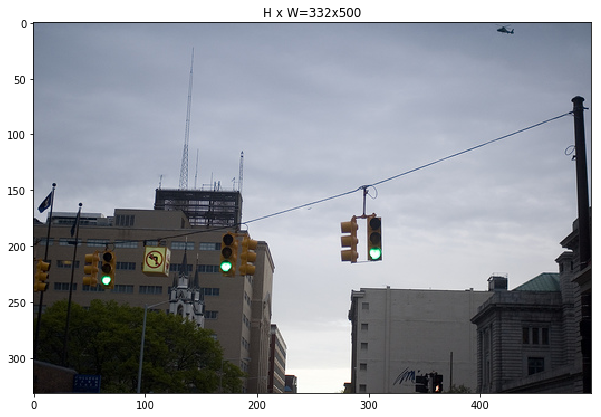

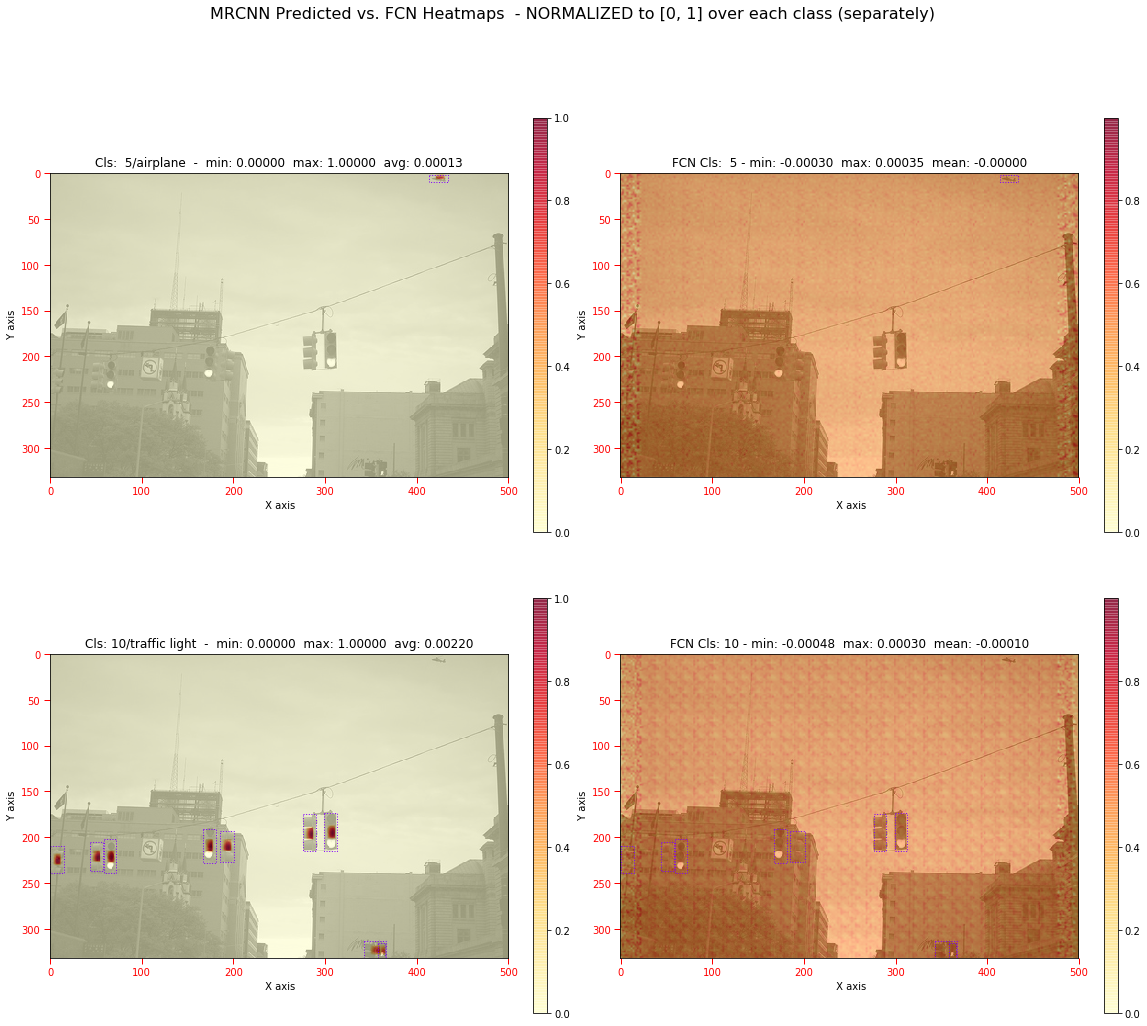

In [29]:
visualize.inference_heatmaps_compare(fcn_results, image_id = 0 , hm = 'fcn_hm', 
                     config = mrcnn_model.config, class_ids = pr_class_ids, class_names = coco_class_names, scaling = 'each')

####  3D comparative display `pred_heatmap` / `fcn_heatmap` 

3
Image : 1  Predicted    ClassIds: [0, 1, 26]
Display classes: [0, 1, 26]
 image height/width  256 256
shape pos  (256, 256, 2) shape Z1:  (256, 256, 81) shape Z2: (256, 256, 81)
 min_z1_all shape: ()  min_z1_all: 0.0  max_z1_all: () max_z1_all: 1.0
 min_z2_all shape: ()  min_z2_all: -0.060993116  max_z2_all: () max_z2_all: 0.9137283
ttl:  HM1 Img:  0 Cls:  0/BG  -  min: 0.00000  max: 0.00000
ttl:  HM2 Img:  0 Cls:  0/BG  -  min: -0.06099  max: 0.04964
ttl:  HM1 Img:  0 Cls:  1/person  -  min: 0.00000  max: 1.00000
ttl:  HM2 Img:  0 Cls:  1/person  -  min: -0.00366  max: 0.91373
ttl:  HM1 Img:  0 Cls: 26/umbrella  -  min: 0.00000  max: 1.00000
ttl:  HM2 Img:  0 Cls: 26/umbrella  -  min: -0.00310  max: 0.00411


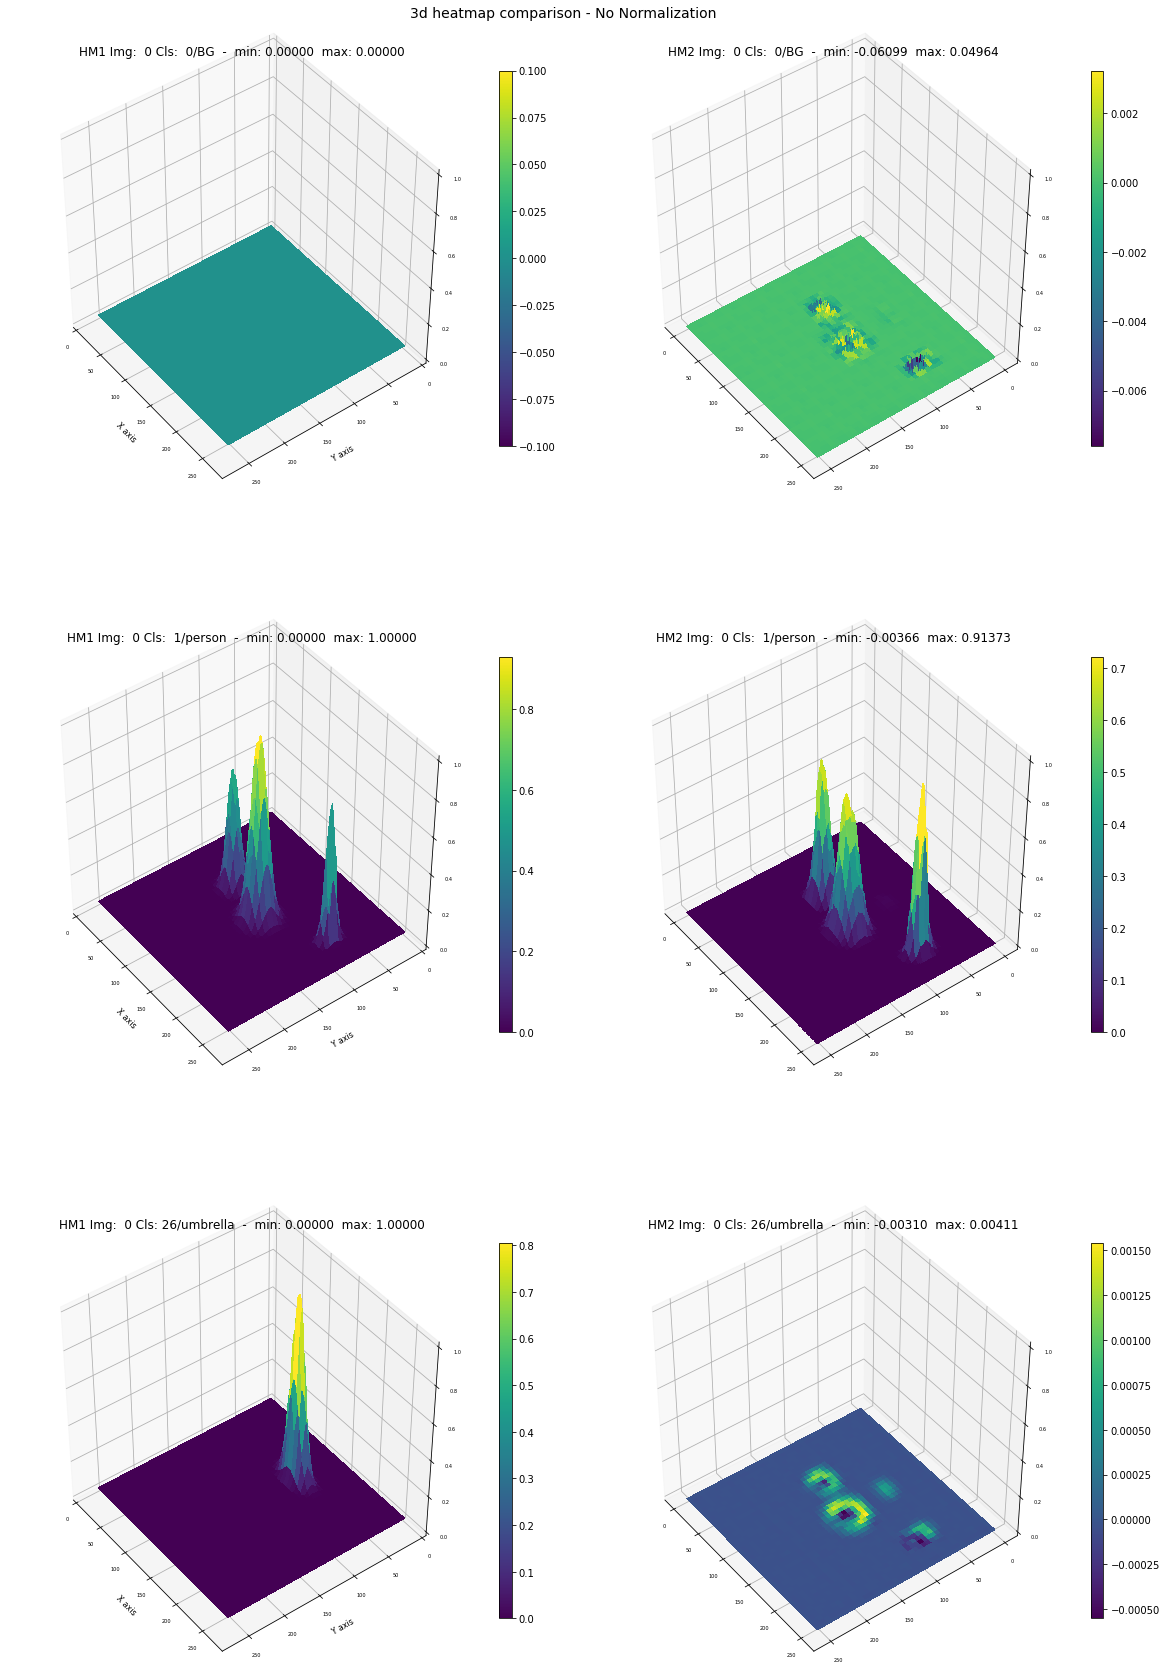

In [76]:
img_id = 0
r = fcn_results[img_id]
print(f['pr_scores_by_class'].ndim)
# print('Image id: ',image_id, ' Coco ID: ', dataset_train.image_info[image_id]['id'])
pr_class_ids = np.unique(f['pr_scores_by_class'][:,:,4]).astype(int).tolist()
print('Image : {}  Predicted    ClassIds: {}'.format(img_id, pr_class_ids))

visualize.plot_3d_heatmap_compare(f['pr_hm'], f['fcn_hm'], 0, class_ids = pr_class_ids, 
                            class_names = class_names, size=(8,8), zlim = 'all' , scaling = 'none')    